# Format Australia demand data to hourly

I am assuming all times are AEST, taken from here: https://github.com/UNSW-CEEM/NEMOSIS/wiki/Column-Summary

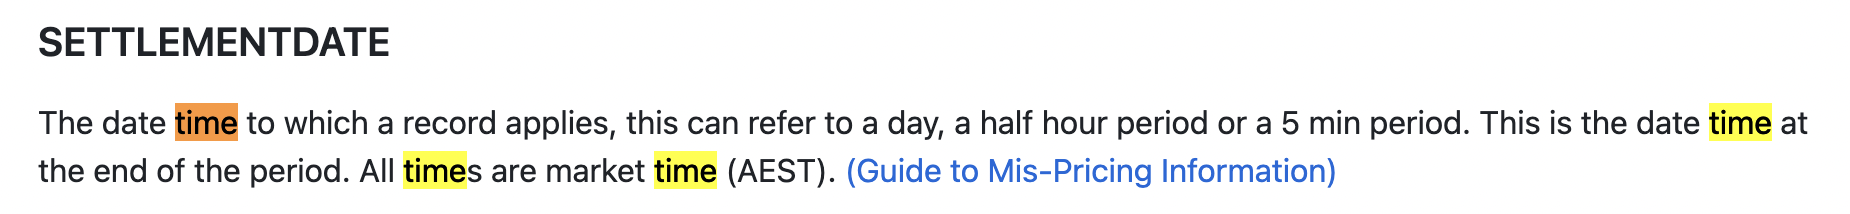

In [1]:
import pandas as pd

In [2]:
data_path = "/g/data/w42/dr6273/work/projects/Aus_energy/data/energy_demand/"

In [3]:
dem = pd.read_csv(
    data_path+"2010_2020demand.zip",
    header=3,
    parse_dates={'timestamp': ['Date','Time']},
    index_col="timestamp",
    usecols=["Date", "Time", "NSW1", "QLD1", "SA1", "TAS1", "VIC1"]
)

Convert to UTC from AEST (makes things easier with climate data)

In [4]:
dem.index -= pd.DateOffset(hours=10)

In [5]:
dem.head()

,NSW1,QLD1,SA1,TAS1,VIC1
timestamp,,,,,
2009-12-31 14:30:00,7809.31,5422.25,1385.23,947.59,5111.02
2009-12-31 15:00:00,7483.69,5315.98,1338.53,926.52,4960.03
2009-12-31 15:30:00,7117.23,5186.70,1260.39,906.13,5283.40
2009-12-31 16:00:00,6812.03,5050.83,1189.31,907.17,5046.15
2009-12-31 16:30:00,6544.33,4924.74,1141.12,895.16,4796.18


The data are in MW. This is the output at any moment. We want to convert this to MWh/day. To convert these 30-minute ratings, we multiply them by 0.5 hours:

In [9]:
dem_mwh = dem / 2

Then we can sum by day

In [12]:
dem_daily = dem_mwh.resample("D").sum()

Remove first and last row as incomplete days

In [14]:
dem_daily = dem_daily.iloc[1:-1]

Rename columns

In [15]:
dem_daily.columns = ["NSW", "QLD", "SA", "TAS", "VIC"]

In [16]:
dem_daily

,NSW,QLD,SA,TAS,VIC
timestamp,,,,,
2010-01-01,200345.265,141770.410,30926.095,24913.555,124188.520
2010-01-02,224883.275,154139.850,35463.230,27495.375,140836.955
2010-01-03,205852.705,155611.165,33345.755,26704.820,135756.785
2010-01-04,200358.115,144340.325,33998.165,27066.485,133162.885
2010-01-05,202376.745,138618.890,33345.325,27855.585,131333.895
...,...,...,...,...,...
2020-12-26,148560.875,133604.660,28401.905,23455.155,89992.680
2020-12-27,163156.770,140284.485,24340.780,24503.505,95380.895
2020-12-28,162005.010,149172.215,22611.945,24423.715,88760.630


Write

In [17]:
dem_daily.to_csv(
    data_path+"daily_demand_2010-2020.csv"
)

Also calculate monthly

In [18]:
dem_monthly = dem_daily.resample("M").sum()

Now exclude last month as missing last day

In [19]:
dem_monthly = dem_monthly.iloc[:-1]

In [20]:
dem_monthly

,NSW,QLD,SA,TAS,VIC
timestamp,,,,,
2010-01-31,6653265.075,4779786.885,1119899.345,839808.660,4257226.965
2010-02-28,5942291.490,4197436.170,1042385.860,741722.895,3882039.230
2010-03-31,6484836.780,4453868.140,1162610.020,839904.655,4352404.185
2010-04-30,6087400.395,4286117.925,1068538.860,825777.605,4116709.020
2010-05-31,6623083.540,4375010.660,1153950.885,905276.190,4374532.445
...,...,...,...,...,...
2020-07-31,6224335.130,4511463.950,1064732.260,896579.810,3902861.640
2020-08-31,5822386.215,4259218.810,985094.185,856388.390,3634618.110
2020-09-30,5276099.810,4137130.950,885641.045,811436.185,3317839.545


In [21]:
dem_monthly.to_csv(
    data_path+"monthly_demand_2010-2020.csv"
)